# Prelude 

In [1]:
from landau.phases import LinePhase, IdealSolution
from landau.calculate import calc_phase_diagram
from landau.plot import plot_phase_diagram, plot_1d_T_phase_diagram, plot_1d_mu_phase_diagram, plot_mu_phase_diagram

In [2]:
import numpy as np
from scipy.constants import Boltzmann, eV
kB = Boltzmann/eV

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Phases Setup

Set up some simple toy phase models that yields this phase diagram.

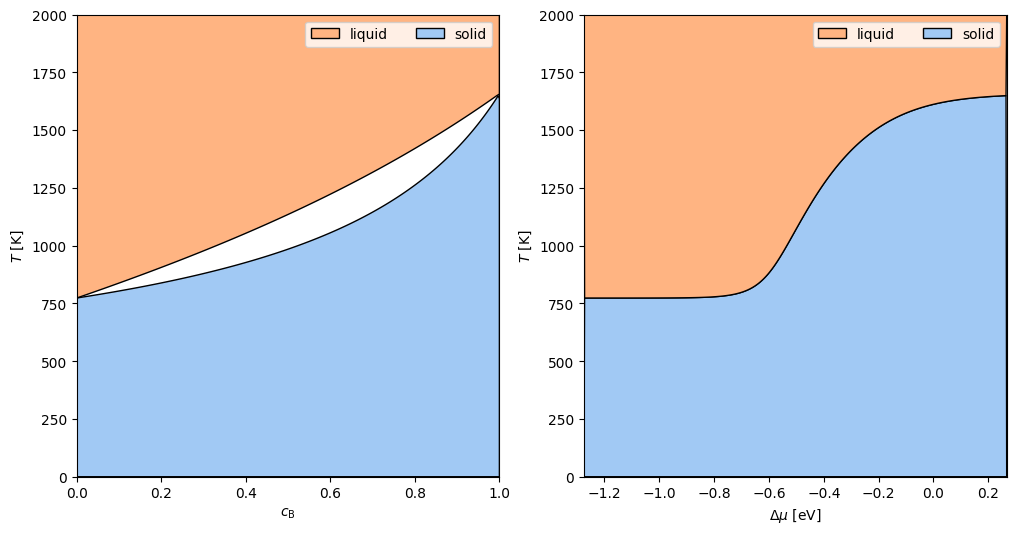

In [4]:
solid_a = LinePhase('A', fixed_concentration=0, line_energy=-2.0, line_entropy=1.0*kB)
solid_b = LinePhase('B', fixed_concentration=1, line_energy=-3.0, line_entropy=1.5*kB)

In [5]:
solid = IdealSolution('solid', solid_a, solid_b)

In [6]:
liquid_a = LinePhase('A(l)', fixed_concentration=0, line_energy=-1.9, line_entropy=2.5*kB)
liquid_b = LinePhase('B(l)', fixed_concentration=1, line_energy=-2.9, line_entropy=2.2*kB)

In [7]:
liquid = IdealSolution('liquid', liquid_a, liquid_b)

# Examples for congruent melting

For the terminals and at fixed concentration, the chemical potential difference does not matter, so we can set it to zero.
In this case the semigrand potential is equal to the free energy.

<Axes: xlabel='Temperature [K]', ylabel='Semi-grandcanonical potential [eV/atom]'>

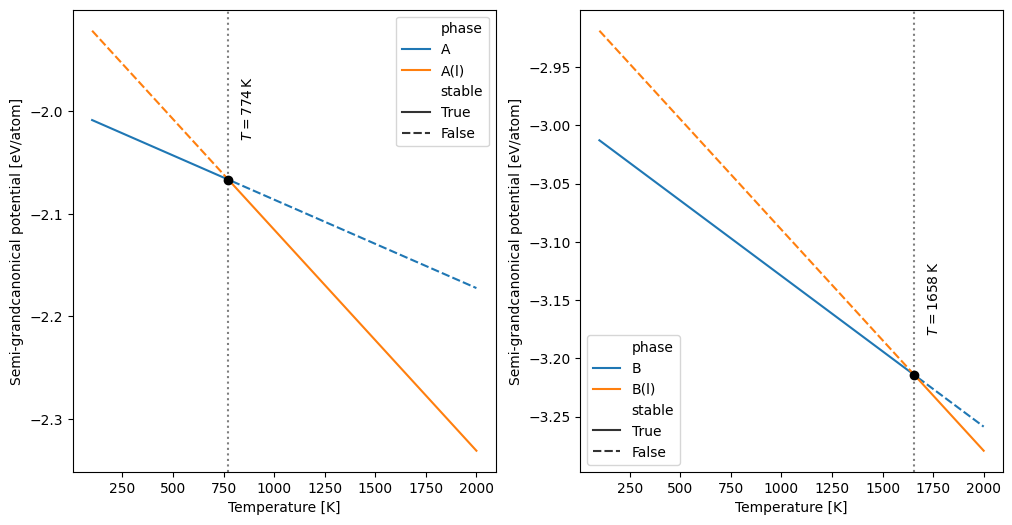

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
df = calc_phase_diagram([solid_a, liquid_a], Ts=np.linspace(100, 2000, 100), mu=0.0, keep_unstable=True)
plot_1d_T_phase_diagram(df, ax=plt.gca(), show=False)

plt.subplot(122)
df = calc_phase_diagram([solid_b, liquid_b], Ts=np.linspace(100, 2000, 100), mu=0.0, keep_unstable=True)
plot_1d_T_phase_diagram(df, ax=plt.gca(), show=False)

# Non-Congruent Melting

However, the general formulation in the semigrand ensemble allows us to also investigate non-congruent melting transitions using the exact same code and formalism.

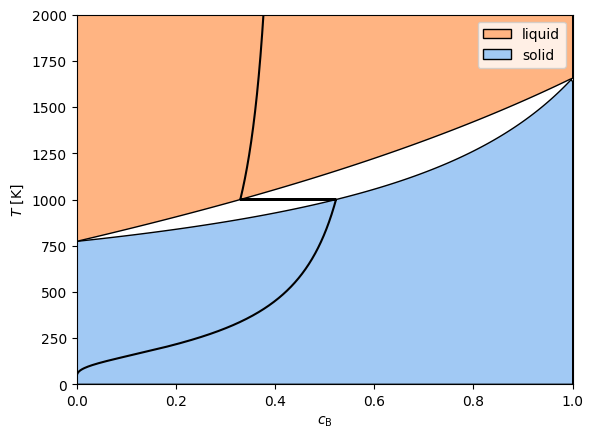

To do this, let's first find out, what's the chemical potential difference where liquid and solid are in equilibrium at, say, 1000K.

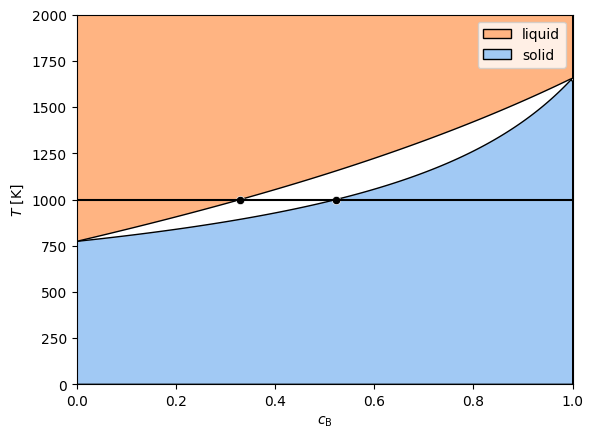

In [9]:
T_twophase = 1000

In [10]:
df = calc_phase_diagram([solid, liquid], Ts=T_twophase, mu=1000, keep_unstable=True)

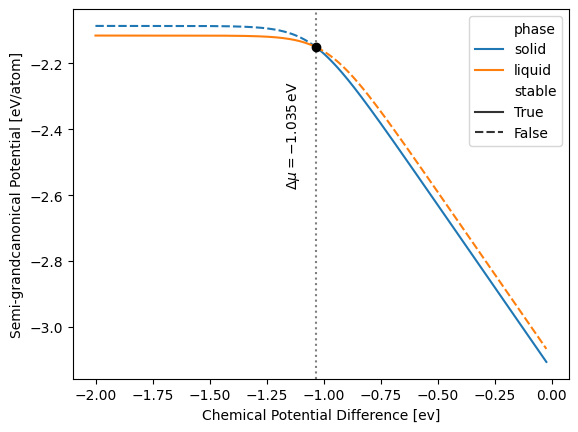

In [11]:
plot_1d_mu_phase_diagram(df)

From the results, we can already get the concentrations on the liquidus and solidus, either by plot isotherms or numerically from the dataframe.

In [12]:
df.query('border')

,T,phase,phi,mu,c,stable,border,refined,f,f_excess
2000,1000,liquid,-2.149932,-1.035211,0.329906,True,True,mu,-2.491454,-0.041544
2001,1000,solid,-2.149932,-1.035211,0.522831,True,True,mu,-2.691173,-0.045672


In [13]:
mu_equilibrium_1000k = df.query('border').mu.iloc[0] # ~ -1.035 eV

In [14]:
mu_equilibrium_1000k

np.float64(-1.0352114196607491)

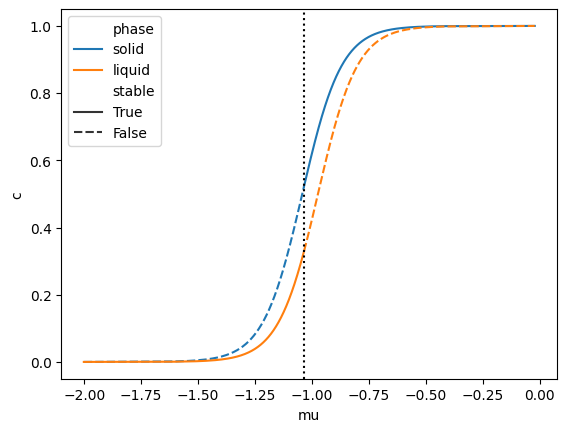

In [15]:
sns.lineplot(
    data=df,
    x='mu', y='c',
    hue='phase',
    style='stable', style_order=[True, False],
)
plt.axvline(mu_equilibrium_1000k, ls='dotted', c='k')

Using the `f` and `f_excess` columns, we can also plot the more familiar common tangent construction.

<Axes: xlabel='c', ylabel='f'>

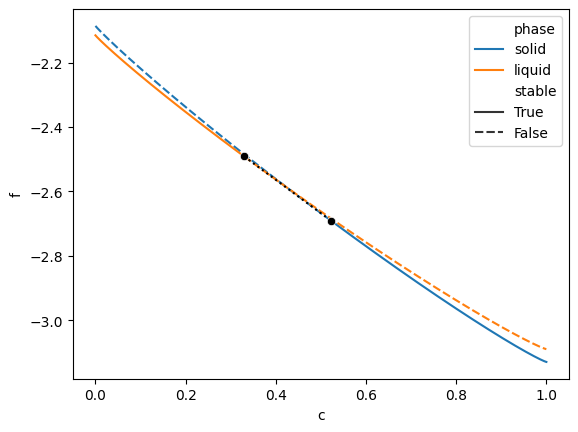

In [16]:
sns.lineplot(
    data=df,
    x='c', y='f',
    hue='phase',
    style='stable', style_order=[True, False]
)
sns.lineplot(
    data=df.query('border'),
    x='c', y='f',
    ls='dotted', c='k'
)
sns.scatterplot(
    data=df.query('border'),
    x='c', y='f',
    c='k',
    zorder=2
)

Difficult to see in $f$ due to linear shift, let's use $f_\mathrm{excess}$ to see it more clearly.

<Axes: xlabel='c', ylabel='f_excess'>

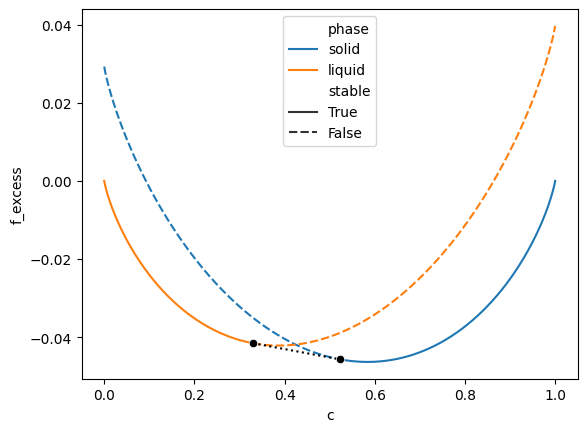

In [17]:
sns.lineplot(
    data=df,
    x='c', y='f_excess',
    hue='phase',
    style='stable', style_order=[True, False]
)
sns.lineplot(
    data=df.query('border'),
    x='c', y='f_excess',
    ls='dotted', c='k'
)
sns.scatterplot(
    data=df.query('border'),
    x='c', y='f_excess',
    c='k',
    zorder=2
)

In [18]:
df = calc_phase_diagram([solid, liquid], Ts=np.linspace(0, 2000, 1000), mu=mu_equilibrium_1000k, keep_unstable=True, refine=True)

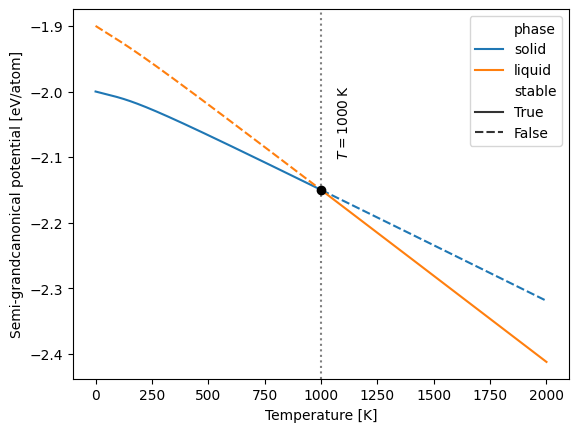

<Axes: xlabel='Temperature [K]', ylabel='Semi-grandcanonical potential [eV/atom]'>

In [19]:
plot_1d_T_phase_diagram(df)

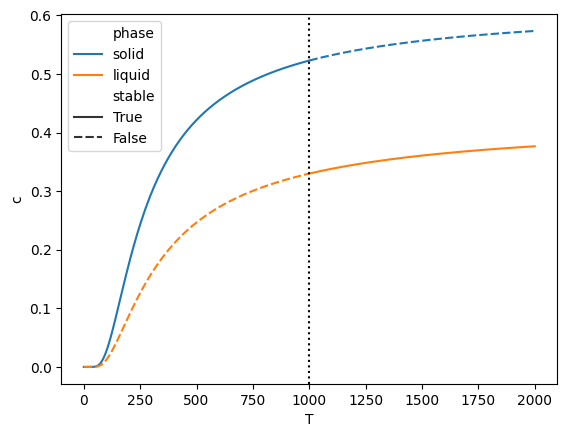

In [20]:
sns.lineplot(
    data=df,
    x='T', y='c',
    hue='phase',
    style='stable', style_order=[True, False],
)
plt.axvline(T_twophase, ls='dotted', c='k')

# Appendix: Inline Plots

Code that generates the pasted pictures above.

In [31]:
bdf = calc_phase_diagram([solid, liquid], Ts=np.linspace(0, 2000, 100), mu=200, keep_unstable=True)

## Fig1

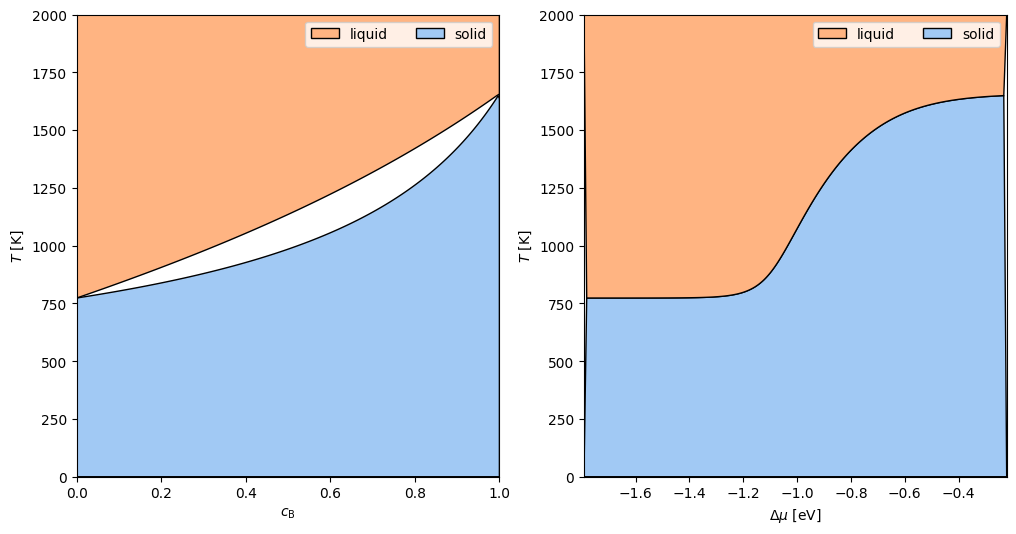

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_phase_diagram(bdf, element='B', poly_method='fasttsp')
plt.subplot(122)
plot_mu_phase_diagram(bdf, element='B', poly_method='fasttsp')

## Fig3

In [34]:
T_twophase = 1000

In [35]:
df1000 = calc_phase_diagram([solid, liquid], Ts=1000, mu=1000, keep_unstable=True)
mu_equilibrium_1000k = df.query('border').mu.iloc[0]

<Axes: xlabel='$c_\\mathrm{B}$', ylabel='$T$ [K]'>

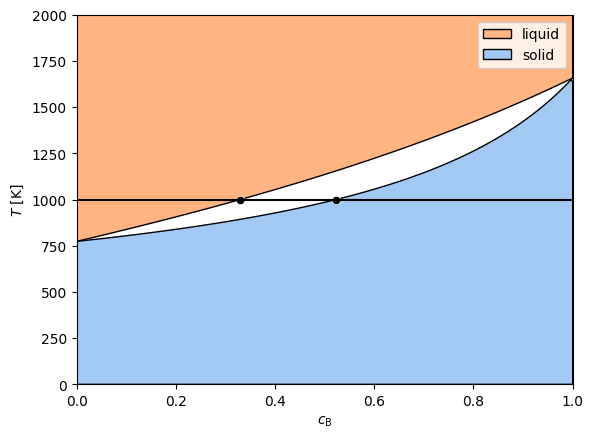

In [36]:
plot_phase_diagram(bdf, element='B', poly_method='fasttsp')
plt.axhline(1000, ls='-', c='k')
sns.scatterplot(
    data=df1000.query('border'),
    x='c', y='T',
    marker='o', c='k'
)

## Fig2

In [38]:
dfisomu = calc_phase_diagram([solid, liquid], Ts=np.linspace(0, 2000, 1000), mu=mu_equilibrium_1000k, keep_unstable=True, refine=True)

<Axes: xlabel='$c_\\mathrm{B}$', ylabel='$T$ [K]'>

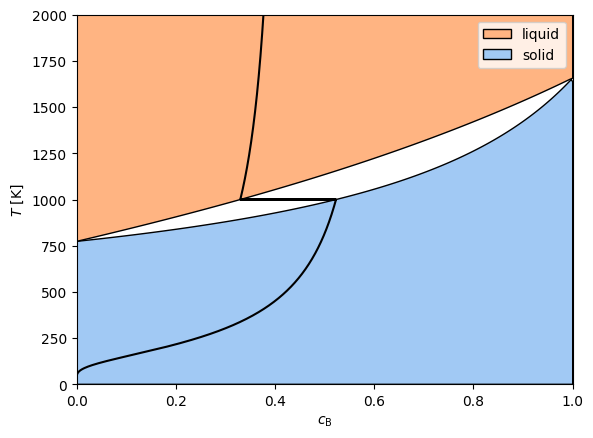

In [39]:
plot_phase_diagram(bdf, element='B', poly_method='fasttsp')
sns.lineplot(
    data=dfisomu.query('stable'),
    x='c', y='T',
    orient='y', 
    # sort=False,
    estimator=None,
    c='k'
)